/var/folders/j2/g16nd4ld17z43clcp8bbjqv80000gn/T/ipykernel_37414/2119704771.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


--------------------------------------------------------------------------------
Running experiment for S. cerevisiae
Classifiers:  ['SC_ALL', 'SC_GENPROT', 'SC_NO_GENPROT']
--------------------------------------------------------------------------------
--------------------------------------------------
Running classifier SC_ALL
--------------------------------------------------
Features: 42, Mean PPV (1%): 0.5639130434782609
Features: 41, Mean PPV (1%): 0.5534782608695652
Features: 40, Mean PPV (1%): 0.5513043478260871
Features: 39, Mean PPV (1%): 0.5804347826086956
Features: 38, Mean PPV (1%): 0.568695652173913
Features: 37, Mean PPV (1%): 0.5795652173913044
Features: 36, Mean PPV (1%): 0.59
Features: 35, Mean PPV (1%): 0.5956521739130435
Features: 34, Mean PPV (1%): 0.6034782608695651
Features: 33, Mean PPV (1%): 0.6147826086956523
Features: 32, Mean PPV (1%): 0.6047826086956523
Features: 31, Mean PPV (1%): 0.612608695652174
Features: 30, Mean PPV (1%): 0.6621739130434783
Features:

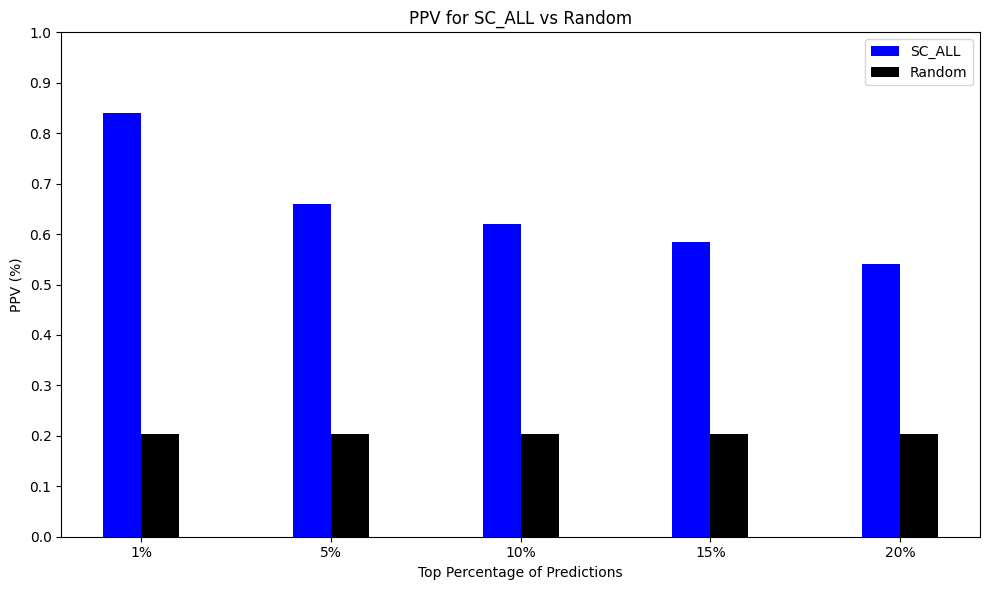

--------------------------------------------------
Running classifier SC_GENPROT
--------------------------------------------------
Features: 16, Mean PPV (1%): 0.7869565217391303
Features: 15, Mean PPV (1%): 0.7965217391304347
Features: 14, Mean PPV (1%): 0.7882608695652175
Features: 13, Mean PPV (1%): 0.7821739130434782
Features: 12, Mean PPV (1%): 0.7904347826086956
Features: 11, Mean PPV (1%): 0.8491304347826084
Features: 10, Mean PPV (1%): 0.8526086956521739
Features: 9, Mean PPV (1%): 0.8547826086956521
Features: 8, Mean PPV (1%): 0.8352173913043478
Features: 7, Mean PPV (1%): 0.7965217391304347
Features: 6, Mean PPV (1%): 0.8060869565217391
Features: 5, Mean PPV (1%): 0.8113043478260868
Features: 4, Mean PPV (1%): 0.7417391304347827
Features: 3, Mean PPV (1%): 0.6526086956521739
Features: 2, Mean PPV (1%): 0.6395652173913043
Features: 1, Mean PPV (1%): 0.5782608695652174
Highest PPV (1%): 0.8547826086956521
Optimal number of features: 9
Final PPV Percentiles: [0.85434783 0.71262

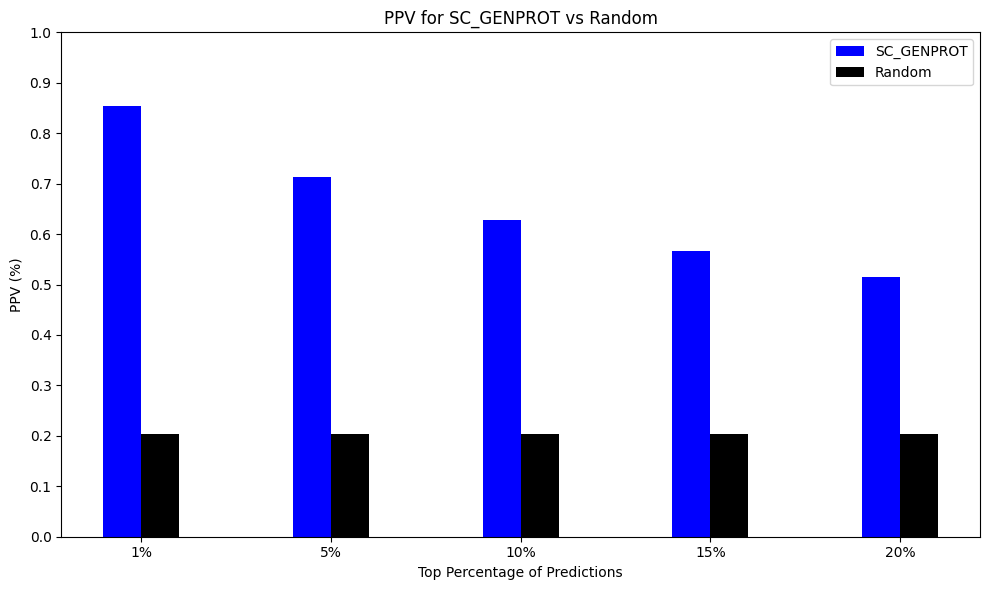

--------------------------------------------------
Running classifier SC_NO_GENPROT
--------------------------------------------------
Features: 15, Mean PPV (1%): 0.6282608695652173
Features: 14, Mean PPV (1%): 0.5721739130434782
Features: 13, Mean PPV (1%): 0.5743478260869566
Features: 12, Mean PPV (1%): 0.5486956521739131
Features: 11, Mean PPV (1%): 0.5360869565217391
Features: 10, Mean PPV (1%): 0.5095652173913042
Features: 9, Mean PPV (1%): 0.4752173913043478
Features: 8, Mean PPV (1%): 0.4565217391304348
Features: 7, Mean PPV (1%): 0.5360869565217391
Features: 6, Mean PPV (1%): 0.5221739130434783
Features: 5, Mean PPV (1%): 0.5173913043478261
Features: 4, Mean PPV (1%): 0.508695652173913
Features: 3, Mean PPV (1%): 0.3756521739130435
Features: 2, Mean PPV (1%): 0.3026086956521739
Features: 1, Mean PPV (1%): 0.25739130434782603
Highest PPV (1%): 0.6282608695652173
Optimal number of features: 15
Final PPV Percentiles: [0.62782609 0.47347458 0.40533898 0.39652542 0.3775    ]


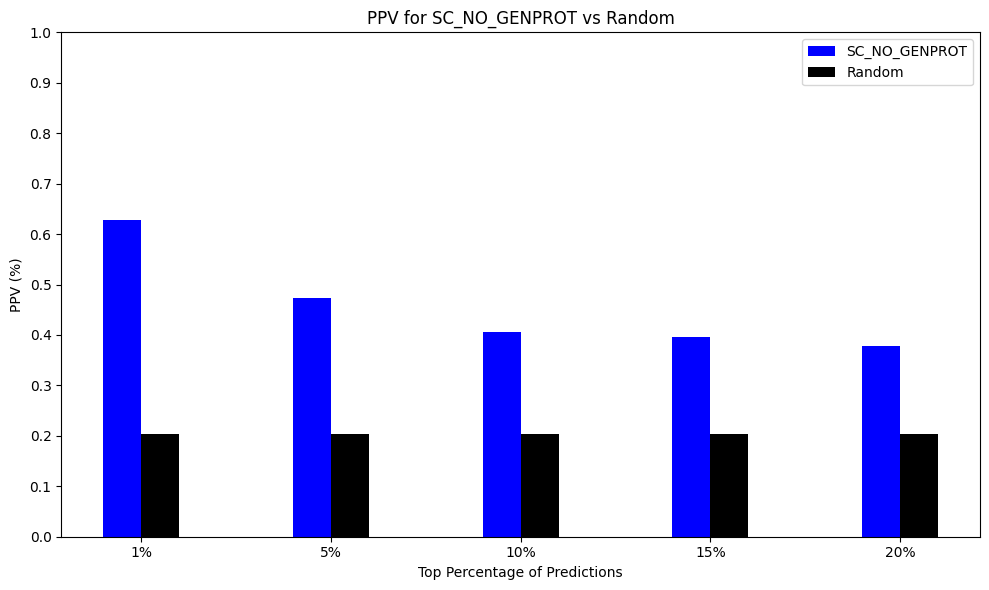

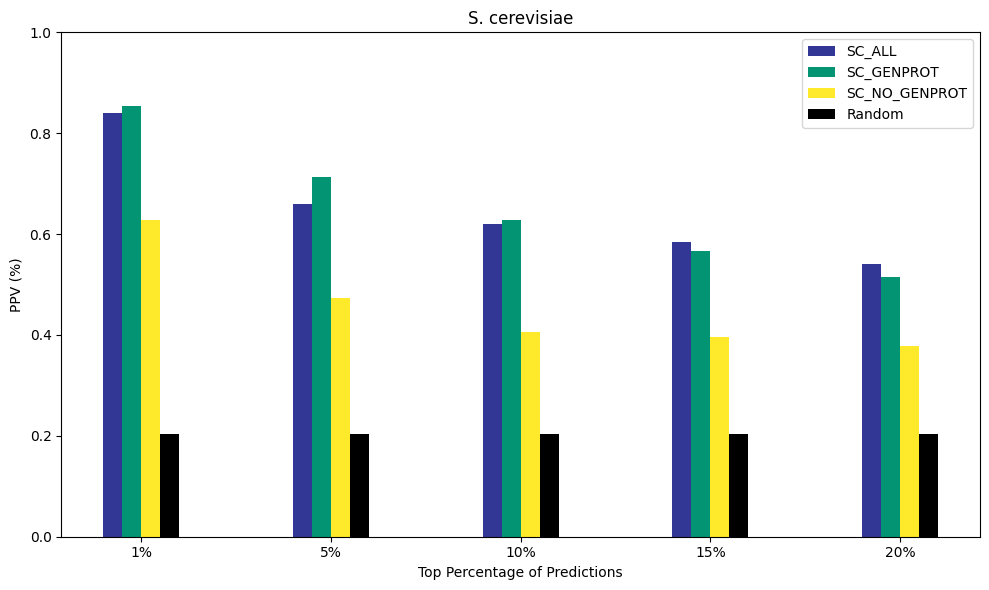

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt



PERCENTILES = [1, 5, 10, 15, 20] # Top 1%, 5%, 10%, 15%, 20%
ITERATIONS = 100  # Use 100 iterations as per the article


# CMIM ranking of features pre-calculated
CMIM_SC_NO_GENPROT = ['paralagous_count', 'upstream_size',  'CAI', 'GLU',
                'aromaticity_score', 'Gravy_score', 'downstream_size',
               'PI', 'MET', 'ASP', 'GLN',  'LYS', 'FOP_score', 'ARG',  'Codon_bias']

CMIM_SC_GENPROT = ['phyletic_retention', 'paralagous_count', 'upstream_size',  'GLU', 'Codon_bias',
                'aromaticity_score', 'Gravy_score', 'CAI', 'downstream_size',
               'PI', 'MET', 'ASP', 'GLN',  'LYS', 'FOP_score', 'ARG']

CMIM_SC_ALL = ['phyletic_retention', 'paralagous_count', 'DIP_degree', 'nucleolus',
                'nucleus', 'upstream_size', 'spindle pole', 'GLU', 'Codon_bias',
                'aromaticity_score', 'Gravy_score', 'CAI', 'downstream_size',
                'vacuole', 'endosome', 'mitochondrion', 'PI', 'cytoplasm',
                'promoter_count(Harbison_et_al)', 'vacuolar membrane', 'MET', 'ASP',
                'ER to Golgi', 'GLN', 'peroxisome', 'num places loc', 'LYS',
                'ambiguous', 'cell periphery', 'FOP_score', 'nuclear periphery', 'ARG',
                'Golgi to ER', 'punctate composite', 'ER', 'lipid particle', 'microtubule',
                'Golgi', 'bud neck', 'actin', 'bud', 'Golgi to Vacuole']





class EssentiallyClassifier:
    def __init__(self, file_path, cmim_ranking, percentiles, iterations,name):
        self.name = name
        self.file_path = file_path
        self.cmim_ranking = cmim_ranking
        self.percentiles = percentiles
        self.iterations = iterations
        self.X = None
        self.y = None
        self.optimal_features = None
        self.highest_ppv_1 = 0
        self.final_ppv_scores = []

    def load_discretized_data(self):
        discretized_data = pd.read_excel(self.file_path, sheet_name='entropy discretized')
        columns_with_symbols = discretized_data.columns[2:]
        label_encoders = {}

        for column in columns_with_symbols:
            le = LabelEncoder()
            discretized_data[column] = le.fit_transform(discretized_data[column].astype(str))
            label_encoders[column] = le

        self.X = discretized_data.drop(columns=['Essential', 'orf_id'])
        self.y = discretized_data['Essential']

    def calculate_top_percentile_ppv(self, probabilities, true_labels):
        sorted_indices = np.argsort(probabilities)[::-1]
        sorted_labels = true_labels[sorted_indices]
        ppv_percentiles = []

        for p in self.percentiles:
            n_top = int(len(sorted_labels) * (p / 100))
            if n_top == 0:
                ppv_percentiles.append(0)
            else:
                top_labels = sorted_labels[:n_top]
                ppv = np.sum(top_labels) / len(top_labels)
                ppv_percentiles.append(ppv)

        return ppv_percentiles

    def calcolate_boostrap_iteration(self, X_selected):
        X_train, X_test, y_train, y_test = train_test_split(X_selected, self.y, test_size=0.5, stratify=self.y)

        X_train_minority = X_train[y_train == 1]
        y_train_minority = y_train[y_train == 1]

        # X_train_oversampled, y_train_oversampled = resample(
        #     X_train_minority, y_train_minority,
        #     replace=True,
        #     n_samples=np.sum(y_train == 0),
        #     random_state=42
        # )

        X_train_oversampled = X_train_minority
        y_train_oversampled = y_train_minority

        X_train_balanced = pd.concat([X_train[y_train == 0], X_train_oversampled])
        y_train_balanced = pd.concat([y_train[y_train == 0], y_train_oversampled])

        nb_classifier = GaussianNB()
        nb_classifier.fit(X_train_balanced, y_train_balanced)
        y_prob = nb_classifier.predict_proba(X_test)[:, 1]

        return self.calculate_top_percentile_ppv(y_prob, y_test.to_numpy())

    def find_optimal_features(self):
        X_ranked = self.X[self.cmim_ranking]

        for i in range(len(self.cmim_ranking), 0, -1):
            X_selected = X_ranked.iloc[:, :i]
            ppv_1_scores = []

            for _ in range(self.iterations):
                ppv_iteration = self.calcolate_boostrap_iteration(X_selected)
                ppv_1_scores.append(ppv_iteration[0])

            mean_ppv_1 = np.mean(ppv_1_scores)
            print(f"Features: {i}, Mean PPV (1%): {mean_ppv_1}")

            if mean_ppv_1 > self.highest_ppv_1:
                self.highest_ppv_1 = mean_ppv_1
                self.optimal_features = i

        print("Highest PPV (1%):", self.highest_ppv_1)
        print("Optimal number of features:", self.optimal_features)

    def evaluate_final_model(self):
        X_optimal = self.X[self.cmim_ranking].iloc[:, :self.optimal_features]

        for _ in range(self.iterations):
            ppv_iteration = self.calcolate_boostrap_iteration(X_optimal)
            self.final_ppv_scores.append(ppv_iteration)

        final_ppv = np.mean(self.final_ppv_scores, axis=0)
        print("Final PPV Percentiles:", final_ppv)
        return final_ppv

    def plot_ppv_results(self, final_ppv):
        fig, ax = plt.subplots(figsize=(10, 6))
        labels = [f'{p}%' for p in self.percentiles]
        random_ppv = [np.mean(self.y)] * len(self.percentiles)
        width = 0.2

        ax.bar(np.arange(len(self.percentiles)) - width / 2, final_ppv, width, label=self.name, color='blue')
        ax.bar(np.arange(len(self.percentiles)) + width / 2, random_ppv, width, label='Random', color='black')
        ax.set_xlabel('Top Percentage of Predictions')
        ax.set_ylabel('PPV (%)')
        ax.set_title(f'PPV for {self.name} vs Random')
        ax.set_xticks(np.arange(len(self.percentiles)))
        ax.set_xticklabels(labels)
        ax.set_ylim(0, 1)
        ax.set_yticks(np.arange(0, 1.1, 0.1))
        ax.legend()
        fig.tight_layout()
        plt.show()


    def run(self):
        self.load_discretized_data()
        self.find_optimal_features()
        final_ppv = self.evaluate_final_model()
        self.plot_ppv_results(final_ppv)




class EssentialityExperiment:
    def __init__(self, name, classifiers):
        self.name = name
        self.classifiers = classifiers
        self.results = [] 

    def run_experiment(self):
        print("-" * 80)
        print(f"Running experiment for {self.name}")
        print("Classifiers: ", [classifier.name for classifier in self.classifiers])
        print("-" * 80)


        for classifier in self.classifiers:
            print("-" * 50)
            print(f"Running classifier {classifier.name}")
            print("-" * 50)
            classifier.run()
            self.results.append((classifier.cmim_ranking[0], classifier.final_ppv_scores))
    
    def plot_comparative_results(self, percentiles, colors=None):
        if colors is None:
            colors = plt.cm.get_cmap('tab10').colors

        fig, ax = plt.subplots(figsize=(10, 6))
        labels = [f'{p}%' for p in percentiles]
        x = np.arange(len(percentiles))
        width = 0.1

        for idx, classifier in enumerate(self.classifiers):
            mean_ppv = np.mean(classifier.final_ppv_scores, axis=0)
            ax.bar(x + idx * width, mean_ppv, width, label=classifier.name, color=colors[idx % len(colors)])

        random_ppv = [np.mean(self.classifiers[0].y)] * len(percentiles)
        ax.bar(x + len(self.classifiers) * width, random_ppv, width, label='Random', color='black')

        ax.set_xlabel('Top Percentage of Predictions')
        ax.set_ylabel('PPV (%)')
        ax.set_title(self.name)
        ax.set_xticks(x + width * (len(self.classifiers) / 2))
        ax.set_xticklabels(labels)
        ax.set_ylim(0, 1)
        ax.legend()
        fig.tight_layout()
        plt.show()







classifier_no_genprot = EssentiallyClassifier('cerevisiae_data.xls', CMIM_SC_NO_GENPROT, PERCENTILES, ITERATIONS, name='SC_NO_GENPROT')
classifier_genprot = EssentiallyClassifier('cerevisiae_data.xls', CMIM_SC_GENPROT, PERCENTILES, ITERATIONS, name='SC_GENPROT')
classifier_all = EssentiallyClassifier('cerevisiae_data.xls', CMIM_SC_ALL, PERCENTILES, ITERATIONS, name='SC_ALL')

experiment = EssentialityExperiment("S. cerevisiae", [classifier_all,classifier_genprot, classifier_no_genprot])
experiment.run_experiment()
experiment.plot_comparative_results(PERCENTILES, colors=['#323694', '#039573', '#feea2a'])


